# Stock Price Prediction using Graph Convolutional Layer

In [1]:
# import libraries
import os
import pandas as pd

In [2]:
# Import Libraries for Graph, GNN, and GCN
import stellargraph as sg
from stellargraph import StellarGraph
from stellargraph.layer import DeepGraphCNN
from stellargraph.mapper import FullBatchNodeGenerator
from stellargraph.layer import GCN

In [3]:
# Machine Learnig related library Imports
from tensorflow.keras import layers, optimizers, losses, metrics, Model
from sklearn import preprocessing, model_selection
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
# If we want to drop NAN column or row wise
drop_cols_with_na = 1
drop_rows_with_na = 1

In [5]:
# Dataset: Use Fortune 30 companies as the paper used

In [6]:
df_s = pd.DataFrame();
data_file = "per-day-fortune-30-company-stock-price-data.csv";
df_s = pd.read_csv("./data/" + data_file, low_memory = False);
df_s.head()

,Date,AAPL,ABC,AMZN,ANTM,BA,BAC,CAH,COST,CVS,...,PCAR,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
0,2017-01-03 00:00:00,29.037500,82.610001,37.683498,NaN,156.970001,22.530001,74.480003,159.729996,80.349998,...,43.546665,86.790001,32.492447,161.449997,102.519997,54.580002,82.959999,56.000000,68.660004,90.889999
1,2017-01-04 00:00:00,29.004999,84.660004,37.859001,NaN,158.619995,22.950001,75.629997,159.759995,79.750000,...,44.146667,87.260002,32.303623,161.910004,103.139999,54.520000,82.980003,56.049999,69.059998,89.889999
2,2017-01-05 00:00:00,29.152500,83.680000,39.022499,NaN,158.710007,22.680000,74.500000,162.910004,81.419998,...,43.426666,86.739998,32.212990,162.179993,102.129997,54.639999,83.029999,55.180000,69.209999,88.550003
3,2017-01-06 00:00:00,29.477501,84.800003,39.799500,NaN,159.100006,22.680000,75.330002,162.830002,82.199997,...,43.919998,85.400002,31.208460,162.410004,103.190002,53.259998,83.099998,55.040001,68.260002,88.500000
4,2017-01-09 00:00:00,29.747499,85.480003,39.846001,NaN,158.320007,22.549999,74.760002,160.970001,81.699997,...,43.380001,84.019997,30.815710,161.949997,102.419998,52.680000,82.550003,54.240002,68.709999,87.040001


In [7]:
# convert Date field to be a Date Type
df_s["Date"] = df_s["Date"].astype('datetime64[ns]')

# Sort data by date although this is no longer needed as data already is sorted
#df_s = df_s.sort_values( by = ['Ticker','Date'], ascending = True )
df_s = df_s.sort_values( by = 'Date', ascending = True )
df_s.head()

,Date,AAPL,ABC,AMZN,ANTM,BA,BAC,CAH,COST,CVS,...,PCAR,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
0,2017-01-03,29.037500,82.610001,37.683498,NaN,156.970001,22.530001,74.480003,159.729996,80.349998,...,43.546665,86.790001,32.492447,161.449997,102.519997,54.580002,82.959999,56.000000,68.660004,90.889999
1,2017-01-04,29.004999,84.660004,37.859001,NaN,158.619995,22.950001,75.629997,159.759995,79.750000,...,44.146667,87.260002,32.303623,161.910004,103.139999,54.520000,82.980003,56.049999,69.059998,89.889999
2,2017-01-05,29.152500,83.680000,39.022499,NaN,158.710007,22.680000,74.500000,162.910004,81.419998,...,43.426666,86.739998,32.212990,162.179993,102.129997,54.639999,83.029999,55.180000,69.209999,88.550003
3,2017-01-06,29.477501,84.800003,39.799500,NaN,159.100006,22.680000,75.330002,162.830002,82.199997,...,43.919998,85.400002,31.208460,162.410004,103.190002,53.259998,83.099998,55.040001,68.260002,88.500000
4,2017-01-09,29.747499,85.480003,39.846001,NaN,158.320007,22.549999,74.760002,160.970001,81.699997,...,43.380001,84.019997,30.815710,161.949997,102.419998,52.680000,82.550003,54.240002,68.709999,87.040001


In [8]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html
df_s_transpose = df_s

try:
  df_s_transpose = df_s_transpose.interpolate(inplace = False)
except:
  print("An exception occurred. Operation ignored")
  exit
    
df_s_transpose.isnull().values.any()
df_s_transpose[df_s_transpose.isna().any(axis = 1)]    

An exception occurred. Operation ignored


,Date,AAPL,ABC,AMZN,ANTM,BA,BAC,CAH,COST,CVS,...,PCAR,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
0,2017-01-03,29.037500,82.610001,37.683498,NaN,156.970001,22.530001,74.480003,159.729996,80.349998,...,43.546665,86.790001,32.492447,161.449997,102.519997,54.580002,82.959999,56.000000,68.660004,90.889999
1,2017-01-04,29.004999,84.660004,37.859001,NaN,158.619995,22.950001,75.629997,159.759995,79.750000,...,44.146667,87.260002,32.303623,161.910004,103.139999,54.520000,82.980003,56.049999,69.059998,89.889999
2,2017-01-05,29.152500,83.680000,39.022499,NaN,158.710007,22.680000,74.500000,162.910004,81.419998,...,43.426666,86.739998,32.212990,162.179993,102.129997,54.639999,83.029999,55.180000,69.209999,88.550003
3,2017-01-06,29.477501,84.800003,39.799500,NaN,159.100006,22.680000,75.330002,162.830002,82.199997,...,43.919998,85.400002,31.208460,162.410004,103.190002,53.259998,83.099998,55.040001,68.260002,88.500000
4,2017-01-09,29.747499,85.480003,39.846001,NaN,158.320007,22.549999,74.760002,160.970001,81.699997,...,43.380001,84.019997,30.815710,161.949997,102.419998,52.680000,82.550003,54.240002,68.709999,87.040001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2019-12-23,71.000000,85.599998,89.650002,NaN,337.549988,35.169998,51.130001,293.309998,74.379997,...,53.033333,112.669998,29.509064,295.089996,179.419998,61.400002,58.570000,53.810001,119.029999,70.290001
749,2019-12-24,71.067497,85.419998,89.460503,NaN,333.000000,35.220001,51.290001,294.230011,74.510002,...,52.993332,113.199997,29.425982,294.540009,179.889999,61.279999,58.349998,53.820000,119.510002,70.019997
750,2019-12-26,72.477501,85.050003,93.438499,NaN,329.920013,35.520000,51.169998,295.730011,74.480003,...,53.006668,112.059998,29.577040,295.649994,180.809998,61.290001,58.900002,54.150002,119.519997,70.129997
751,2019-12-27,72.449997,84.910004,93.489998,NaN,330.140015,35.349998,51.500000,294.109985,74.400002,...,52.939999,110.599998,29.637463,295.970001,181.410004,61.529999,59.020000,53.919998,119.589996,69.889999


In [9]:
df_s_transpose = df_s

if drop_cols_with_na == 1:
    df_s_transpose = df_s_transpose.dropna(axis = 1);    
   
df_s_transpose, df_s_transpose.shape

(          Date       AAPL        ABC       AMZN          BA        BAC  \
 0   2017-01-03  29.037500  82.610001  37.683498  156.970001  22.530001   
 1   2017-01-04  29.004999  84.660004  37.859001  158.619995  22.950001   
 2   2017-01-05  29.152500  83.680000  39.022499  158.710007  22.680000   
 3   2017-01-06  29.477501  84.800003  39.799500  159.100006  22.680000   
 4   2017-01-09  29.747499  85.480003  39.846001  158.320007  22.549999   
 ..         ...        ...        ...        ...         ...        ...   
 748 2019-12-23  71.000000  85.599998  89.650002  337.549988  35.169998   
 749 2019-12-24  71.067497  85.419998  89.460503  333.000000  35.220001   
 750 2019-12-26  72.477501  85.050003  93.438499  329.920013  35.520000   
 751 2019-12-27  72.449997  84.910004  93.489998  330.140015  35.349998   
 752 2019-12-30  72.879997  83.639999  92.344498  326.399994  35.150002   
 
            CAH        COST        CVS         CVX  ...       PCAR         PSX  \
 0    74.480003 

In [10]:
df_s_transpose.isnull().values.any()
df_s_transpose[df_s_transpose.isna().any( axis = 1 )]

,Date,AAPL,ABC,AMZN,BA,BAC,CAH,COST,CVS,CVX,...,PCAR,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM


In [11]:
# df_s_transpose.index = df_s_transpose['Date']
df_s_transpose.index = df_s_transpose.index.astype('datetime64[ns]')

# Pearson Correlation Coefficient

In [12]:
df_s_transpose_pearson = df_s_transpose.corr(method = 'pearson', numeric_only = True)
df_s_transpose_pearson

,AAPL,ABC,AMZN,BA,BAC,CAH,COST,CVS,CVX,F,...,PCAR,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
AAPL,1.000000,-0.036748,0.786106,0.692570,0.763609,-0.666770,0.863643,-0.342350,0.459125,-0.593845,...,0.427859,0.745233,-0.262982,0.760652,0.798973,0.676181,-0.658245,-0.197965,0.827489,-0.505612
ABC,-0.036748,1.000000,-0.127768,-0.126217,0.163579,0.466160,-0.130971,0.427752,0.029482,0.302385,...,0.154842,0.097029,0.358636,-0.055076,-0.178882,-0.252366,0.300615,0.574354,-0.079702,0.250188
AMZN,0.786106,-0.127768,1.000000,0.909833,0.739494,-0.876488,0.826927,-0.673998,0.601387,-0.721688,...,0.071989,0.690894,-0.677553,0.886126,0.929052,0.708967,-0.763988,-0.409286,0.765665,-0.457154
BA,0.692570,-0.126217,0.909833,1.000000,0.782307,-0.828416,0.699197,-0.661338,0.662725,-0.672301,...,0.103744,0.688694,-0.708575,0.886833,0.873865,0.653679,-0.707509,-0.328412,0.765026,-0.413556
BAC,0.763609,0.163579,0.739494,0.782307,1.000000,-0.523495,0.613895,-0.389465,0.670267,-0.347324,...,0.484901,0.804676,-0.315603,0.770331,0.727145,0.485319,-0.604695,0.127918,0.705303,-0.297798
CAH,-0.666770,0.466160,-0.876488,-0.828416,-0.523495,1.000000,-0.766108,0.746348,-0.539610,0.709460,...,0.059840,-0.558826,0.741128,-0.795163,-0.851249,-0.711528,0.791882,0.596125,-0.739558,0.523205
COST,0.863643,-0.130971,0.826927,0.699197,0.613895,-0.766108,1.000000,-0.553276,0.444068,-0.712750,...,0.317508,0.541579,-0.297706,0.695051,0.902083,0.864420,-0.766485,-0.473844,0.893336,-0.648205
CVS,-0.342350,0.427752,-0.673998,-0.661338,-0.389465,0.746348,-0.553276,1.000000,-0.440430,0.464550,...,0.017925,-0.225111,0.586122,-0.439705,-0.686060,-0.463266,0.850140,0.643467,-0.529032,0.449050
CVX,0.459125,0.029482,0.601387,0.662725,0.670267,-0.539610,0.444068,-0.440430,1.000000,-0.087233,...,0.293140,0.717509,-0.388580,0.594834,0.602565,0.419555,-0.535137,0.040413,0.482086,0.101968
F,-0.593845,0.302385,-0.721688,-0.672301,-0.347324,0.709460,-0.712750,0.464550,-0.087233,1.000000,...,0.115762,-0.306461,0.563575,-0.678168,-0.727356,-0.726151,0.467808,0.607512,-0.640430,0.652238


# Pearson Correlation Coefficient based Adjacency Graph Matrix

In [13]:
df_s_transpose_pearson[df_s_transpose_pearson >= 0.5] = 1
df_s_transpose_pearson[df_s_transpose_pearson < 0.5] = 0
df_s_transpose_pearson

,AAPL,ABC,AMZN,BA,BAC,CAH,COST,CVS,CVX,F,...,PCAR,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
AAPL,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
ABC,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
AMZN,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
BA,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
BAC,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
CAH,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
COST,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
CVS,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
CVX,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
F,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [14]:
# make the diagonal element to be zero. No self loop
import numpy as np
np.fill_diagonal(df_s_transpose_pearson.values, 0)
df_s_transpose_pearson

,AAPL,ABC,AMZN,BA,BAC,CAH,COST,CVS,CVX,F,...,PCAR,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
AAPL,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
ABC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
AMZN,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
BA,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
BAC,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
CAH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
COST,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
CVS,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
CVX,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
F,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Create and visualize the Graphs

In [15]:
import networkx as nx
Graph_pearson = nx.Graph(df_s_transpose_pearson)

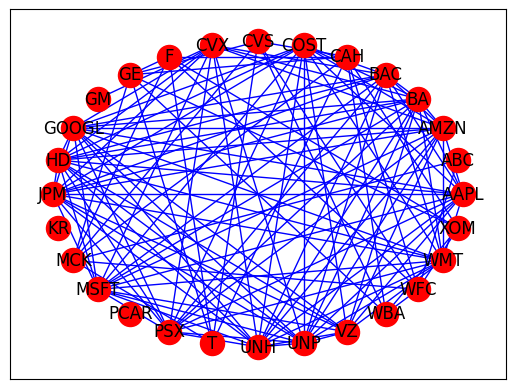

In [16]:
nx.draw_networkx(Graph_pearson, pos=nx.circular_layout(Graph_pearson), node_color='r', edge_color='b')

# Create GCN layer. Pearson

# Find all stocks = nodes

In [17]:
# improvement: make sure only stocks/nodes that are in the graph are taken
all_stock_nodes = df_s_transpose_pearson.index.to_list()
all_stock_nodes

['AAPL',
 'ABC',
 'AMZN',
 'BA',
 'BAC',
 'CAH',
 'COST',
 'CVS',
 'CVX',
 'F',
 'GE',
 'GM',
 'GOOGL',
 'HD',
 'JPM',
 'KR',
 'MCK',
 'MSFT',
 'PCAR',
 'PSX',
 'T',
 'UNH',
 'UNP',
 'VZ',
 'WBA',
 'WFC',
 'WMT',
 'XOM']

# Find all edges between nodes

In [18]:
source = [];
target = [];
edge_feature = [];

for aStock in all_stock_nodes:
    for anotherStock in all_stock_nodes:
        if df_s_transpose_pearson[aStock][anotherStock] > 0:
            #print(df_s_transpose_pearson[aStock][anotherStock])
            source.append(aStock)
            target.append(anotherStock)
            edge_feature.append(1)
            
source, target, edge_feature            

(['AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'ABC',
  'ABC',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'AMZN',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BA',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'BAC',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'CAH',
  'COST',
  'COST',
  'COST',
  'COST',
  'COST',
  'COST',
  'COST',
  'COST',
  'COST',
  'COST',
  'COST',
  'COST',
  'COST',
  'CVS',
  'CVS',
  'CVS',
  'CVS',
  'CVS',
  'CVS',
  'CVX',
  'CVX',
  'CVX',
  'CVX',
  'CVX',
  'CVX',
  'CVX',
  'CVX',
  'CVX',
  'CVX',
  'CVX',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'GE',
  'GE',
  'GE',
  'GE',
  'GE',
  'GE',
  'GE',
  'GM',
  'GOOGL',
  'GOOGL',


In [19]:
# https://stellargraph.readthedocs.io/en/stable/demos/basics/loading-pandas.html
pearson_edges = pd.DataFrame(
    {"source": source, "target": target}
)

pearson_edges_data = pd.DataFrame(
    {"source": source, "target": target, "edge_feature": edge_feature}
)


pearson_edges[:10]

,source,target
0,AAPL,AMZN
1,AAPL,BA
2,AAPL,BAC
3,AAPL,COST
4,AAPL,GOOGL
5,AAPL,HD
6,AAPL,JPM
7,AAPL,MSFT
8,AAPL,PSX
9,AAPL,UNH


# Graph with No Feature Data, No node data, only edges

pearson_graph = StellarGraph(edges = pearson_edges, node_type_default="corner", edge_type_default="line")
#pearson_graph = StellarGraph(nodes = all_stock_nodes, edges = pearson_edges)
# graph = sg.StellarGraph(all_stock_nodes, square_edges)
print(pearson_graph.info())

In [20]:
# Trying to have the time series data as part of the nodes

In [21]:
df_s_transpose

,Date,AAPL,ABC,AMZN,BA,BAC,CAH,COST,CVS,CVX,...,PCAR,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
1970-01-01 00:00:00.000000000,2017-01-03,29.037500,82.610001,37.683498,156.970001,22.530001,74.480003,159.729996,80.349998,117.849998,...,43.546665,86.790001,32.492447,161.449997,102.519997,54.580002,82.959999,56.000000,68.660004,90.889999
1970-01-01 00:00:00.000000001,2017-01-04,29.004999,84.660004,37.859001,158.619995,22.950001,75.629997,159.759995,79.750000,117.820000,...,44.146667,87.260002,32.303623,161.910004,103.139999,54.520000,82.980003,56.049999,69.059998,89.889999
1970-01-01 00:00:00.000000002,2017-01-05,29.152500,83.680000,39.022499,158.710007,22.680000,74.500000,162.910004,81.419998,117.309998,...,43.426666,86.739998,32.212990,162.179993,102.129997,54.639999,83.029999,55.180000,69.209999,88.550003
1970-01-01 00:00:00.000000003,2017-01-06,29.477501,84.800003,39.799500,159.100006,22.680000,75.330002,162.830002,82.199997,116.839996,...,43.919998,85.400002,31.208460,162.410004,103.190002,53.259998,83.099998,55.040001,68.260002,88.500000
1970-01-01 00:00:00.000000004,2017-01-09,29.747499,85.480003,39.846001,158.320007,22.549999,74.760002,160.970001,81.699997,115.839996,...,43.380001,84.019997,30.815710,161.949997,102.419998,52.680000,82.550003,54.240002,68.709999,87.040001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000748,2019-12-23,71.000000,85.599998,89.650002,337.549988,35.169998,51.130001,293.309998,74.379997,120.330002,...,53.033333,112.669998,29.509064,295.089996,179.419998,61.400002,58.570000,53.810001,119.029999,70.290001
1970-01-01 00:00:00.000000749,2019-12-24,71.067497,85.419998,89.460503,333.000000,35.220001,51.290001,294.230011,74.510002,120.339996,...,52.993332,113.199997,29.425982,294.540009,179.889999,61.279999,58.349998,53.820000,119.510002,70.019997
1970-01-01 00:00:00.000000750,2019-12-26,72.477501,85.050003,93.438499,329.920013,35.520000,51.169998,295.730011,74.480003,120.599998,...,53.006668,112.059998,29.577040,295.649994,180.809998,61.290001,58.900002,54.150002,119.519997,70.129997
1970-01-01 00:00:00.000000751,2019-12-27,72.449997,84.910004,93.489998,330.140015,35.349998,51.500000,294.109985,74.400002,120.300003,...,52.939999,110.599998,29.637463,295.970001,181.410004,61.529999,59.020000,53.919998,119.589996,69.889999


# Structure the Feature Matrix so that it can be passed to the GCN

In [22]:
df_s_transpose_feature = df_s_transpose.reset_index(drop = True, inplace = False)
# df_s_transpose_feature =  df_s_transpose_feature.values.tolist()
# print(df_s_transpose_feature.values.tolist())
#df_s_transpose_feature['WY'].values
df_s_transpose_feature['AAPL'].values

array([29.03750038, 29.00499916, 29.15250015, 29.47750092, 29.74749947,
       29.77750015, 29.9375    , 29.8125    , 29.76000023, 30.        ,
       29.99749947, 29.94499969, 30.        , 30.02000046, 29.99250031,
       30.46999931, 30.48500061, 30.48749924, 30.40749931, 30.33749962,
       32.1875    , 32.13249969, 32.27000046, 32.57249832, 32.88249969,
       33.00999832, 33.10499954, 33.02999878, 33.32249832, 33.75500107,
       33.87749863, 33.83750153, 33.93000031, 34.17499924, 34.27750015,
       34.13249969, 34.16500092, 34.23249817, 34.24750137, 34.94749832,
       34.74000168, 34.94499969, 34.83499908, 34.88000107, 34.75      ,
       34.66999817, 34.78499985, 34.79999924, 34.74750137, 35.11500168,
       35.17250061, 34.99750137, 35.36500168, 34.95999908, 35.35499954,
       35.22999954, 35.15999985, 35.22000122, 35.95000076, 36.02999878,
       35.98249817, 35.91500092, 35.92499924, 36.19250107, 36.00500107,
       35.91500092, 35.83499908, 35.79249954, 35.40750122, 35.45

In [23]:
node_Data = [];
for x in all_stock_nodes:
    node_Data.append( df_s_transpose_feature[x].values)
    
    
node_Data    

[array([29.03750038, 29.00499916, 29.15250015, 29.47750092, 29.74749947,
        29.77750015, 29.9375    , 29.8125    , 29.76000023, 30.        ,
        29.99749947, 29.94499969, 30.        , 30.02000046, 29.99250031,
        30.46999931, 30.48500061, 30.48749924, 30.40749931, 30.33749962,
        32.1875    , 32.13249969, 32.27000046, 32.57249832, 32.88249969,
        33.00999832, 33.10499954, 33.02999878, 33.32249832, 33.75500107,
        33.87749863, 33.83750153, 33.93000031, 34.17499924, 34.27750015,
        34.13249969, 34.16500092, 34.23249817, 34.24750137, 34.94749832,
        34.74000168, 34.94499969, 34.83499908, 34.88000107, 34.75      ,
        34.66999817, 34.78499985, 34.79999924, 34.74750137, 35.11500168,
        35.17250061, 34.99750137, 35.36500168, 34.95999908, 35.35499954,
        35.22999954, 35.15999985, 35.22000122, 35.95000076, 36.02999878,
        35.98249817, 35.91500092, 35.92499924, 36.19250107, 36.00500107,
        35.91500092, 35.83499908, 35.79249954, 35.4

In [24]:
pearson_graph_node_data = pd.DataFrame(node_Data, index = all_stock_nodes)
pearson_graph_node_data

,0,1,2,3,4,5,6,7,8,9,...,743,744,745,746,747,748,749,750,751,752
AAPL,29.037500,29.004999,29.152500,29.477501,29.747499,29.777500,29.937500,29.812500,29.760000,30.000000,...,69.964996,70.102501,69.934998,70.004997,69.860001,71.000000,71.067497,72.477501,72.449997,72.879997
ABC,82.610001,84.660004,83.680000,84.800003,85.480003,84.830002,81.529999,83.860001,84.620003,85.989998,...,85.959999,83.150002,83.550003,83.800003,85.669998,85.599998,85.419998,85.050003,84.910004,83.639999
AMZN,37.683498,37.859001,39.022499,39.799500,39.846001,39.794998,39.951000,40.681999,40.856998,40.486000,...,88.460503,89.532997,89.201500,89.613998,89.324997,89.650002,89.460503,93.438499,93.489998,92.344498
BA,156.970001,158.619995,158.710007,159.100006,158.320007,159.070007,159.399994,158.289993,158.830002,157.669998,...,327.000000,327.000000,330.679993,333.500000,328.000000,337.549988,333.000000,329.920013,330.140015,326.399994
BAC,22.530001,22.950001,22.680000,22.680000,22.549999,22.940001,23.070000,22.920000,23.010000,22.049999,...,34.700001,35.040001,35.110001,34.950001,34.959999,35.169998,35.220001,35.520000,35.349998,35.150002
CAH,74.480003,75.629997,74.500000,75.330002,74.760002,75.220001,73.720001,74.190002,75.000000,75.180000,...,53.700001,51.570000,51.099998,50.610001,51.799999,51.130001,51.290001,51.169998,51.500000,50.770000
COST,159.729996,159.759995,162.910004,162.830002,160.970001,161.660004,161.539993,161.869995,161.860001,163.809998,...,293.500000,295.549988,291.869995,293.709991,294.829987,293.309998,294.230011,295.730011,294.109985,295.140015
CVS,80.349998,79.750000,81.419998,82.199997,81.699997,82.669998,82.769997,82.599998,81.980003,83.919998,...,74.400002,73.349998,73.279999,74.099998,74.580002,74.379997,74.510002,74.480003,74.400002,73.699997
CVX,117.849998,117.820000,117.309998,116.839996,115.839996,114.959999,115.930000,116.160004,116.379997,116.279999,...,119.360001,118.599998,118.550003,118.129997,119.680000,120.330002,120.339996,120.599998,120.300003,119.849998
F,12.590000,13.170000,12.770000,12.760000,12.630000,12.850000,12.670000,12.590000,12.630000,12.610000,...,9.390000,9.390000,9.540000,9.410000,9.480000,9.440000,9.470000,9.450000,9.360000,9.250000


# Graph with feature as part of Nodes

In [25]:
pearson_graph_with_node_features = StellarGraph(pearson_graph_node_data, edges = pearson_edges, node_type_default = "corner", edge_type_default = "line")
print(pearson_graph_with_node_features.info())

StellarGraph: Undirected multigraph
 Nodes: 28, Edges: 258

 Node types:
  corner: [28]
    Features: float32 vector, length 753
    Edge types: corner-line->corner

 Edge types:
    corner-line->corner: [258]
        Weights: all 1 (default)
        Features: none


In [26]:
# Generator
generator = FullBatchNodeGenerator(pearson_graph_with_node_features, method = "gcn") # , sparse = False
vars(generator)

Using GCN (local pooling) filters...


{'graph': <stellargraph.core.graph.StellarGraph at 0x2d428952ee0>,
 'name': None,
 'k': 1,
 'teleport_probability': 0.1,
 'method': 'gcn',
 'node_list': Index(['AAPL', 'ABC', 'AMZN', 'BA', 'BAC', 'CAH', 'COST', 'CVS', 'CVX', 'F',
        'GE', 'GM', 'GOOGL', 'HD', 'JPM', 'KR', 'MCK', 'MSFT', 'PCAR', 'PSX',
        'T', 'UNH', 'UNP', 'VZ', 'WBA', 'WFC', 'WMT', 'XOM'],
       dtype='object'),
 'Aadj': <28x28 sparse matrix of type '<class 'numpy.float64'>'
 	with 286 stored elements in Compressed Sparse Row format>,
 'use_sparse': True,
 'features': array([[ 29.0375,  29.005 ,  29.1525, ...,  72.4775,  72.45  ,  72.88  ],
        [ 82.61  ,  84.66  ,  83.68  , ...,  85.05  ,  84.91  ,  83.64  ],
        [ 37.6835,  37.859 ,  39.0225, ...,  93.4385,  93.49  ,  92.3445],
        ...,
        [ 56.    ,  56.05  ,  55.18  , ...,  54.15  ,  53.92  ,  53.6   ],
        [ 68.66  ,  69.06  ,  69.21  , ..., 119.52  , 119.59  , 119.4   ],
        [ 90.89  ,  89.89  ,  88.55  , ...,  70.13  ,  69.89

# Train Test Split

In [27]:
train_subjects, test_subjects = model_selection.train_test_split(
    pearson_graph_node_data #, train_size = 6, test_size = 4
)
# , train_size=6, test_size=None, stratify=pearson_graph_node_data

val_subjects, test_subjects_step_2 = model_selection.train_test_split(
    test_subjects #, test_size = 2
)

#, train_size = 500, test_size = None, stratify = test_subjects


train_subjects.shape, test_subjects.shape, val_subjects.shape, test_subjects_step_2.shape

((21, 753), (7, 753), (5, 753), (2, 753))

In [28]:
pearson_graph_node_data

,0,1,2,3,4,5,6,7,8,9,...,743,744,745,746,747,748,749,750,751,752
AAPL,29.037500,29.004999,29.152500,29.477501,29.747499,29.777500,29.937500,29.812500,29.760000,30.000000,...,69.964996,70.102501,69.934998,70.004997,69.860001,71.000000,71.067497,72.477501,72.449997,72.879997
ABC,82.610001,84.660004,83.680000,84.800003,85.480003,84.830002,81.529999,83.860001,84.620003,85.989998,...,85.959999,83.150002,83.550003,83.800003,85.669998,85.599998,85.419998,85.050003,84.910004,83.639999
AMZN,37.683498,37.859001,39.022499,39.799500,39.846001,39.794998,39.951000,40.681999,40.856998,40.486000,...,88.460503,89.532997,89.201500,89.613998,89.324997,89.650002,89.460503,93.438499,93.489998,92.344498
BA,156.970001,158.619995,158.710007,159.100006,158.320007,159.070007,159.399994,158.289993,158.830002,157.669998,...,327.000000,327.000000,330.679993,333.500000,328.000000,337.549988,333.000000,329.920013,330.140015,326.399994
BAC,22.530001,22.950001,22.680000,22.680000,22.549999,22.940001,23.070000,22.920000,23.010000,22.049999,...,34.700001,35.040001,35.110001,34.950001,34.959999,35.169998,35.220001,35.520000,35.349998,35.150002
CAH,74.480003,75.629997,74.500000,75.330002,74.760002,75.220001,73.720001,74.190002,75.000000,75.180000,...,53.700001,51.570000,51.099998,50.610001,51.799999,51.130001,51.290001,51.169998,51.500000,50.770000
COST,159.729996,159.759995,162.910004,162.830002,160.970001,161.660004,161.539993,161.869995,161.860001,163.809998,...,293.500000,295.549988,291.869995,293.709991,294.829987,293.309998,294.230011,295.730011,294.109985,295.140015
CVS,80.349998,79.750000,81.419998,82.199997,81.699997,82.669998,82.769997,82.599998,81.980003,83.919998,...,74.400002,73.349998,73.279999,74.099998,74.580002,74.379997,74.510002,74.480003,74.400002,73.699997
CVX,117.849998,117.820000,117.309998,116.839996,115.839996,114.959999,115.930000,116.160004,116.379997,116.279999,...,119.360001,118.599998,118.550003,118.129997,119.680000,120.330002,120.339996,120.599998,120.300003,119.849998
F,12.590000,13.170000,12.770000,12.760000,12.630000,12.850000,12.670000,12.590000,12.630000,12.610000,...,9.390000,9.390000,9.540000,9.410000,9.480000,9.440000,9.470000,9.450000,9.360000,9.250000


In [29]:
train_targets = train_subjects; 
val_targets = val_subjects; 
test_targets = test_subjects; 

In [30]:
train_gen = generator.flow(train_subjects.index, train_targets)

In [31]:
# debug
train_subjects.index, 
train_targets

,0,1,2,3,4,5,6,7,8,9,...,743,744,745,746,747,748,749,750,751,752
CAH,74.480003,75.629997,74.500000,75.330002,74.760002,75.220001,73.720001,74.190002,75.000000,75.180000,...,53.700001,51.570000,51.099998,50.610001,51.799999,51.130001,51.290001,51.169998,51.500000,50.770000
KR,33.720001,33.240002,33.209999,33.110001,32.919998,33.189999,33.070000,33.520000,34.099998,34.840000,...,28.309999,28.700001,28.330000,28.760000,29.000000,28.889999,29.100000,28.889999,28.760000,29.059999
PSX,86.790001,87.260002,86.739998,85.400002,84.019997,83.760002,84.889999,84.339996,83.290001,83.559998,...,114.139999,113.029999,113.040001,112.809998,113.349998,112.669998,113.199997,112.059998,110.599998,110.370003
WMT,68.660004,69.059998,69.209999,68.260002,68.709999,68.230003,68.529999,67.970001,67.129997,68.419998,...,120.540001,121.279999,119.860001,120.080002,120.290001,119.029999,119.510002,119.519997,119.589996,119.400002
T,32.492447,32.303623,32.212990,31.208460,30.815710,30.823263,30.672205,30.974319,30.936556,31.049849,...,29.146526,29.078550,29.259819,29.403322,29.569487,29.509064,29.425982,29.577040,29.637463,29.486404
WBA,82.959999,82.980003,83.029999,83.099998,82.550003,82.669998,84.430000,83.919998,83.820000,84.220001,...,57.799999,57.090000,57.200001,57.750000,58.389999,58.570000,58.349998,58.900002,59.020000,58.910000
XOM,90.889999,89.889999,88.550003,88.500000,87.040001,85.930000,86.809998,86.339996,86.349998,87.360001,...,70.000000,69.680000,69.870003,69.389999,69.940002,70.290001,70.019997,70.129997,69.889999,69.480003
ABC,82.610001,84.660004,83.680000,84.800003,85.480003,84.830002,81.529999,83.860001,84.620003,85.989998,...,85.959999,83.150002,83.550003,83.800003,85.669998,85.599998,85.419998,85.050003,84.910004,83.639999
GOOGL,40.400501,40.388500,40.651001,41.260502,41.359001,41.300499,41.493000,41.476501,41.547001,41.373001,...,68.035004,67.744499,67.595497,67.821999,67.560997,67.531502,67.221497,68.123497,67.732002,66.985497
BA,156.970001,158.619995,158.710007,159.100006,158.320007,159.070007,159.399994,158.289993,158.830002,157.669998,...,327.000000,327.000000,330.679993,333.500000,328.000000,337.549988,333.000000,329.920013,330.140015,326.399994


In [32]:
# train data size
# it is not must to use a number like unit_count
unit_count = train_subjects.shape[0]
unit_count

21

In [33]:
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten
from tensorflow import keras

layer_sizes = [32, 32]
activations = ["relu", "relu"]

gcn = GCN(layer_sizes = layer_sizes, activations = activations, generator = generator) #, dropout = 0.5
x_inp, x_out = gcn.in_out_tensors()

# MLP -- Regression
predictions = layers.Dense(units = train_targets.shape[1], activation = "linear")(x_out)
x_out, 
x_inp, x_out

([<KerasTensor: shape=(1, 28, 753) dtype=float32 (created by layer 'input_1')>,
  <KerasTensor: shape=(1, None) dtype=int32 (created by layer 'input_2')>,
  <KerasTensor: shape=(1, None, 2) dtype=int64 (created by layer 'input_3')>,
  <KerasTensor: shape=(1, None) dtype=float32 (created by layer 'input_4')>],
 <KerasTensor: shape=(1, None, 32) dtype=float32 (created by layer 'gather_indices')>)

# hard coded size adjustments
test_subjects_adjusted = test_subjects[:len(val_subjects)]

val_gen = generator.flow(val_subjects.index, test_subjects_adjusted)
# train_gen[1], val_gen[1]

In [34]:
# Models

In [35]:
# loss functions: https://keras.io/api/losses/

model = Model(
    inputs = x_inp, outputs = predictions)

'''
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.1),
    loss=losses.MeanSquaredError(),
    metrics=["acc"],
)
'''

# REF: https://stackoverflow.com/questions/57301698/how-to-change-a-learning-rate-for-adam-in-tf2
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/PolynomialDecay
train_steps = 1000
lr_fn = optimizers.schedules.PolynomialDecay(1e-3, train_steps, 1e-5, 2)


# https://keras.io/api/metrics/
model.compile(
    loss = 'mean_absolute_error', 
    optimizer = optimizers.Adam( lr_fn ),
    # metrics = ['mean_squared_error']
    metrics=['mse', 'mae', 'mape']
)

# mape: https://towardsdatascience.com/choosing-the-correct-error-metric-mape-vs-smape-5328dec53fac
model.compile( 
    loss = 'mean_absolute_error', 
    optimizer = optimizers.Adam(learning_rate = 0.015), 
    #optimizer = optimizers.Adam(lr_fn), 
    # metrics=['mean_squared_error']
    metrics=['mean_squared_error', 'mae', 'mape']
    # metrics=[
    #    metrics.MeanSquaredError(),
    #    metrics.AUC(),
    #]
)

In [36]:
len(x_inp), predictions.shape, print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(1, 28, 753)]       0           []                               
                                                                                                  
 input_3 (InputLayer)           [(1, None, 2)]       0           []                               
                                                                                                  
 input_4 (InputLayer)           [(1, None)]          0           []                               
                                                                                                  
 dropout (Dropout)              (1, 28, 753)         0           ['input_1[0][0]']                
                                                                                              

(4, TensorShape([1, None, 753]), None)

In [37]:
len(val_subjects)
test_subjects_ = test_subjects[:len(val_subjects)]

In [38]:
# hard coded size adjustments
test_subjects_ = test_subjects[:len(val_subjects)]

val_gen = generator.flow(val_subjects.index, test_subjects_)
#train_gen[1], val_gen[1]

train_gen[:1][:4]

In [42]:
type(train_gen_data), type(data_valid), type(x_inp), type(x_out) 

(stellargraph.mapper.sequences.SparseFullBatchSequence,
 stellargraph.mapper.sequences.SparseFullBatchSequence,
 list,
 keras.engine.keras_tensor.KerasTensor)

Epoch 1/10
1/1 - 3s - loss: 91.0733 - mean_squared_error: 13763.0400 - mae: 91.0733 - mape: 101.5566 - val_loss: 123.6653 - val_mean_squared_error: 23036.7598 - val_mae: 123.6653 - val_mape: 145.0596 - 3s/epoch - 3s/step
Epoch 2/10
1/1 - 0s - loss: 92.7276 - mean_squared_error: 15910.7383 - mae: 92.7276 - mape: 155.0960 - val_loss: 96.7202 - val_mean_squared_error: 14582.7676 - val_mae: 96.7202 - val_mape: 78.5382 - 79ms/epoch - 79ms/step
Epoch 3/10
1/1 - 0s - loss: 68.2978 - mean_squared_error: 9336.0498 - mae: 68.2978 - mape: 81.9103 - val_loss: 99.6291 - val_mean_squared_error: 14637.5234 - val_mae: 99.6291 - val_mape: 122.4928 - 74ms/epoch - 74ms/step
Epoch 4/10
1/1 - 0s - loss: 72.8613 - mean_squared_error: 9667.7812 - mae: 72.8613 - mape: 133.4515 - val_loss: 78.2879 - val_mean_squared_error: 9251.8809 - val_mae: 78.2879 - val_mape: 82.9929 - 86ms/epoch - 86ms/step
Epoch 5/10
1/1 - 0s - loss: 51.0836 - mean_squared_error: 5454.5601 - mae: 51.0836 - mape: 86.5558 - val_loss: 75.38

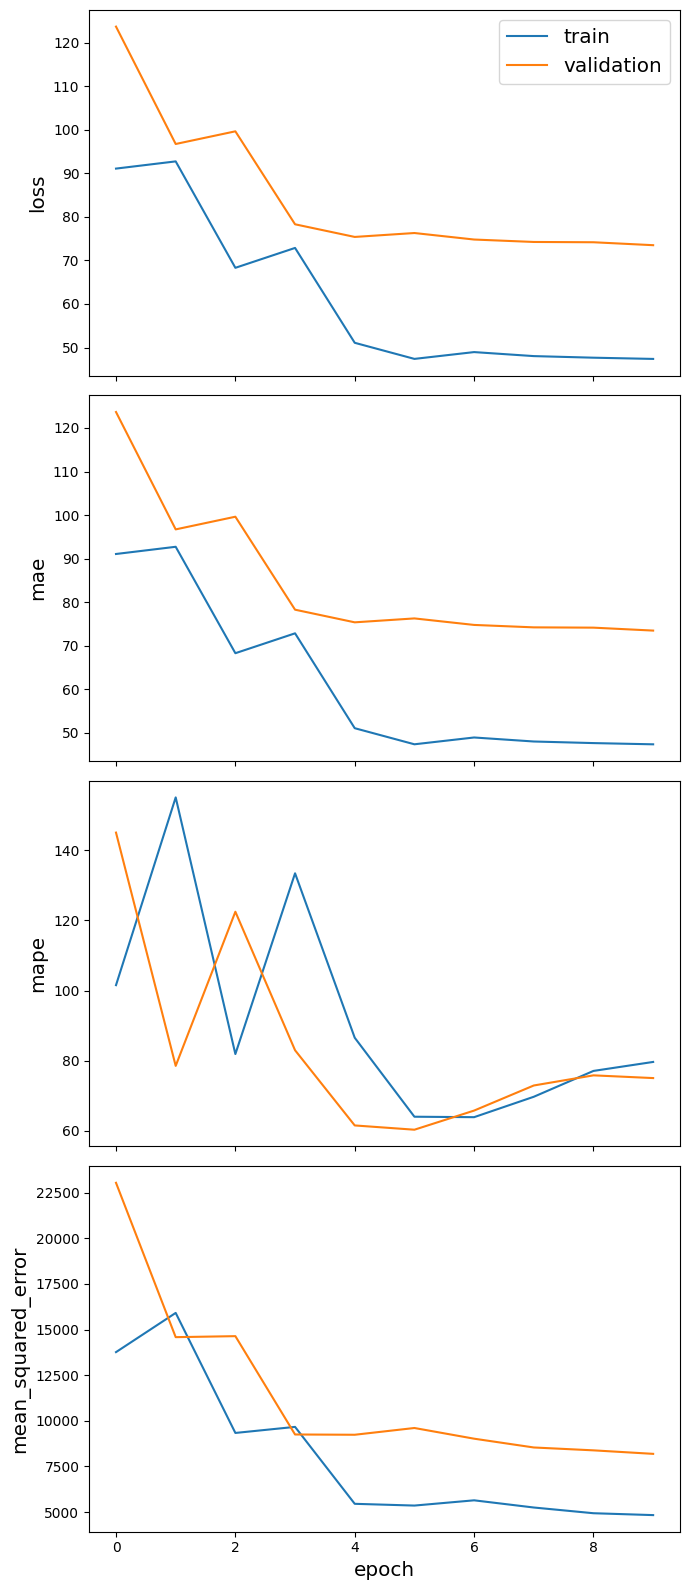

In [39]:
# https://keras.io/api/callbacks/early_stopping/
from tensorflow.keras.callbacks import EarlyStopping

epochs_to_test = 10
patience_to_test = 10

es_callback = EarlyStopping(
    monitor = "val_mean_squared_error", 
    patience = patience_to_test, 
    restore_best_weights = True
)

data_valid = val_gen #[:1][:4];
train_gen_data = train_gen #[:1][:4];

history = model.fit( train_gen_data, epochs = epochs_to_test, validation_data = data_valid, verbose = 2,    
    # shuffling = true means shuffling the whole graph
    shuffle = False, callbacks = [es_callback],
)
sg.utils.plot_history(history)

# [1]

In [40]:
stop

NameError: name 'stop' is not defined

In [ ]:
val_subjects, 
test_subjects

In [ ]:
test_gen = generator.flow(test_subjects.index, test_targets)
test_metrics = model.evaluate(test_gen)
print("\nTest Set Metrics:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))
    
    
    

In [ ]:
df_metrics = pd.DataFrame(columns=['Method', 'Loss', 'MSE', 'MAE', 'MAPE'])

temp = list()
temp.append('GCN-Pearson');
for name, val in zip(model.metrics_names, test_metrics):
    # print(val)
    temp.append(val)

print(temp)
df_metrics.loc[1] = temp
df_metrics

# Show the predicted prices by the Model

At this point, I still need to make sense of what GCN ( and CNN) combination + MLP is predicting. 
I am just displaying the output. 
It appears that price is predicted for each timestamp (day)

In [ ]:
all_nodes = pearson_graph_node_data.index;
all_gen = generator.flow(all_nodes)
all_predictions = model.predict(all_gen)

all_nodes, all_predictions, all_predictions.shape, pearson_graph_node_data.shape

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict
model.predict(
    all_gen,
    batch_size = None,
    verbose = 2,
    steps = None,
    callbacks = None,
    max_queue_size = 10,
    workers = 1,
    use_multiprocessing = False
)

In [ ]:
# all_predictions = model.predict(all_nodes)

# all_predictions, all_predictions.shape, pearson_graph_node_data.shape
vars(all_gen)

In [ ]:
pearson_graph_node_data

In [ ]:
vars(all_gen)

In [ ]:
train_gen[:1][:4]

# SPEARMAN

In [ ]:
# Spearman

df_s_transpose_spearman = df_s_transpose.corr(method = 'spearman', numeric_only = True)
df_s_transpose_spearman


# # Pearson Correlation Coefficient based Adjacency Graph Matrix

# In[32]:


df_s_transpose_spearman[df_s_transpose_spearman >= 0.4] = 1
df_s_transpose_spearman[df_s_transpose_spearman < 0.4] = 0
df_s_transpose_spearman


# In[33]:


# make the diagonal element to be zero. No self loop
import numpy as np
np.fill_diagonal(df_s_transpose_spearman.values, 0)
df_s_transpose_spearman


# Create and visualize the Graphs

# In[34]:


import networkx as nx
Graph_spearman = nx.Graph(df_s_transpose_spearman)


# In[36]:


nx.draw_networkx(Graph_spearman, pos=nx.circular_layout(Graph_spearman), node_color='r', edge_color='b')


# # Create GCN layer. Graph_spearman

# # Find all stocks = nodes

# In[37]:


# improvement: make sure only stocks/nodes that are in the graph are taken
all_stock_nodes = df_s_transpose_spearman.index.to_list()
all_stock_nodes


# # Find all edges between nodes

# In[38]:


source = [];
target = [];
edge_feature = [];

for aStock in all_stock_nodes:
    for anotherStock in all_stock_nodes:
        if df_s_transpose_spearman[aStock][anotherStock] > 0:
            #print(df_s_transpose_spearman[aStock][anotherStock])
            source.append(aStock)
            target.append(anotherStock)
            edge_feature.append(1)
            
source, target, edge_feature            


# In[39]:


# https://stellargraph.readthedocs.io/en/stable/demos/basics/loading-pandas.html
spearman_edges = pd.DataFrame(
    {"source": source, "target": target}
)

spearman_edges_data = pd.DataFrame(
    {"source": source, "target": target, "edge_feature": edge_feature}
)


spearman_edges[:10]


# # Graph with No Feature Data, No node data, only edges

# spearman_graph = StellarGraph(edges = spearman_edges, node_type_default="corner", edge_type_default="line")
# #spearman_graph = StellarGraph(nodes = all_stock_nodes, edges = spearman_edges)
# # graph = sg.StellarGraph(all_stock_nodes, square_edges)
# print(spearman_graph.info())

# In[40]:


# Trying to have the time series data as part of the nodes


# In[41]:


df_s_transpose


# # Structure the Feature Matrix so that it can be passed to the GCN

# In[43]:


df_s_transpose_feature = df_s_transpose.reset_index(drop = True, inplace = False)
# df_s_transpose_feature =  df_s_transpose_feature.values.tolist()
# print(df_s_transpose_feature.values.tolist())
#df_s_transpose_feature['WY'].values
df_s_transpose_feature['AAPL'].values


# In[44]:


node_Data = [];
for x in all_stock_nodes:
    node_Data.append( df_s_transpose_feature[x].values)
    
    
node_Data    


# In[45]:


spearman_graph_node_data = pd.DataFrame(node_Data, index = all_stock_nodes)
spearman_graph_node_data


# # Graph with feature as part of Nodes

# In[46]:


spearman_graph_with_node_features = StellarGraph(spearman_graph_node_data, edges = spearman_edges, node_type_default = "corner", edge_type_default = "line")
print(pearson_graph_with_node_features.info())


# In[47]:


# Generator
generator = FullBatchNodeGenerator(spearman_graph_with_node_features, method = "gcn") # , sparse = False
vars(generator)


# # Train Test Split

# In[48]:


train_subjects, test_subjects = model_selection.train_test_split(
    spearman_graph_node_data #, train_size = 6, test_size = 4
)
# , train_size=6, test_size=None, stratify=pearson_graph_node_data

val_subjects, test_subjects_step_2 = model_selection.train_test_split(
    test_subjects #, test_size = 2
)

#, train_size = 500, test_size = None, stratify = test_subjects


train_subjects.shape, test_subjects.shape, val_subjects.shape, test_subjects_step_2.shape


# In[49]:


spearman_graph_node_data


# In[50]:


train_targets = train_subjects; 
val_targets = val_subjects; 
test_targets = test_subjects; 


# In[51]:


train_gen = generator.flow(train_subjects.index, train_targets)


# In[52]:


# debug
train_subjects.index, 
train_targets


# In[53]:


# train data size
# it is not must to use a number like unit_count
unit_count = train_subjects.shape[0]
unit_count


# In[54]:


from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten
from tensorflow import keras

layer_sizes = [32, 32]
activations = ["relu", "relu"]

gcn = GCN(layer_sizes = layer_sizes, activations = activations, generator = generator) #, dropout = 0.5
x_inp, x_out = gcn.in_out_tensors()

# MLP -- Regression
predictions = layers.Dense(units = train_targets.shape[1], activation = "linear")(x_out)
x_out, 
x_inp, x_out


# # hard coded size adjustments
# test_subjects_adjusted = test_subjects[:len(val_subjects)]
# 
# val_gen = generator.flow(val_subjects.index, test_subjects_adjusted)
# # train_gen[1], val_gen[1]

# In[55]:


# Models


# In[56]:


# loss functions: https://keras.io/api/losses/

model = Model(
    inputs = x_inp, outputs = predictions)

'''
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.1),
    loss=losses.MeanSquaredError(),
    metrics=["acc"],
)
'''

# REF: https://stackoverflow.com/questions/57301698/how-to-change-a-learning-rate-for-adam-in-tf2
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/PolynomialDecay
train_steps = 1000
lr_fn = optimizers.schedules.PolynomialDecay(1e-3, train_steps, 1e-5, 2)


# https://keras.io/api/metrics/
model.compile(
    loss = 'mean_absolute_error', 
    optimizer = optimizers.Adam( lr_fn ),
    # metrics = ['mean_squared_error']
    metrics=['mse', 'mae', 'mape']
)

# mape: https://towardsdatascience.com/choosing-the-correct-error-metric-mape-vs-smape-5328dec53fac
model.compile( 
    loss = 'mean_absolute_error', 
    optimizer = optimizers.Adam(learning_rate = 0.015), 
    #optimizer = optimizers.Adam(lr_fn), 
    # metrics=['mean_squared_error']
    metrics=['mean_squared_error', 'mae', 'mape']
    # metrics=[
    #    metrics.MeanSquaredError(),
    #    metrics.AUC(),
    #]
)


# In[57]:


len(x_inp), predictions.shape, print(model.summary())


# In[58]:


len(val_subjects)
test_subjects_ = test_subjects[:len(val_subjects)]


# In[59]:


# hard coded size adjustments
test_subjects_ = test_subjects[:len(val_subjects)]

val_gen = generator.flow(val_subjects.index, test_subjects_)
#train_gen[1], val_gen[1]


# train_gen[:1][:4]

# In[60]:


# https://keras.io/api/callbacks/early_stopping/
from tensorflow.keras.callbacks import EarlyStopping

#epochs_to_test = 1000
#patience_to_test = 1000

es_callback = EarlyStopping(
    monitor = "val_mean_squared_error", 
    patience = patience_to_test, 
    restore_best_weights = True
)

data_valid = val_gen #[:1][:4];
train_gen_data = train_gen #[:1][:4];

history = model.fit( train_gen_data, epochs = epochs_to_test, validation_data = data_valid, verbose = 2,    
    # shuffling = true means shuffling the whole graph
    shuffle = False, callbacks = [es_callback],
)
sg.utils.plot_history(history)



In [ ]:
# [1]


# In[61]:


val_subjects, 
test_subjects


# In[62]:


test_gen = generator.flow(test_subjects.index, test_targets)
test_metrics = model.evaluate(test_gen)
print("\nTest Set Metrics:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))
    
    
#df_metrics = pd.DataFrame(columns=['Method', 'Loss', 'MSE', 'MAE', 'MAPE'])

temp = list()
temp.append('GCN-Spearman');
for name, val in zip(model.metrics_names, test_metrics):
    # print(val)
    temp.append(val)

print(temp)
df_metrics.loc[2] = temp
df_metrics

    


# # Show the predicted prices by the Model
# 
# At this point, I still need to make sense of what GCN ( and CNN) combination + MLP is predicting. 
# I am just displaying the output. 
# It appears that price is predicted for each timestamp (day)

# In[63]:


all_nodes = spearman_graph_node_data.index;
all_gen = generator.flow(all_nodes)
all_predictions = model.predict(all_gen)

all_nodes, all_predictions, all_predictions.shape, spearman_graph_node_data.shape


# In[64]:


# https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict
model.predict(
    all_gen,
    batch_size = None,
    verbose = 2,
    steps = None,
    callbacks = None,
    max_queue_size = 10,
    workers = 1,
    use_multiprocessing = False
)


# In[65]:


# all_predictions = model.predict(all_nodes)

# all_predictions, all_predictions.shape, spearman_graph_node_data.shape
vars(all_gen)


# In[66]:


spearman_graph_node_data


# In[67]:


vars(all_gen)


# In[ ]:


# In[68]:


train_gen[:1][:4]


# In[ ]:



# Kendal Tau

In [ ]:
# kendall_tau

df_s_transpose_kendall_tau = df_s_transpose.corr(method = 'kendall', numeric_only = True)
df_s_transpose_kendall_tau


# # kendall_tau Correlation Coefficient based Adjacency Graph Matrix

# In[32]:


df_s_transpose_kendall_tau[df_s_transpose_kendall_tau >= 0.3] = 1
df_s_transpose_kendall_tau[df_s_transpose_kendall_tau < 0.3] = 0
df_s_transpose_kendall_tau


# In[33]:


# make the diagonal element to be zero. No self loop
import numpy as np
np.fill_diagonal(df_s_transpose_kendall_tau.values, 0)
df_s_transpose_kendall_tau


# Create and visualize the Graphs

# In[34]:


import networkx as nx
Graph_kendall_tau = nx.Graph(df_s_transpose_kendall_tau)


# In[36]:


nx.draw_networkx(Graph_kendall_tau, pos=nx.circular_layout(Graph_kendall_tau), node_color='r', edge_color='b')


# # Create GCN layer. Graph_kendall_tau

# # Find all stocks = nodes

# In[37]:


# improvement: make sure only stocks/nodes that are in the graph are taken
all_stock_nodes = df_s_transpose_kendall_tau.index.to_list()
all_stock_nodes


# # Find all edges between nodes

# In[38]:


source = [];
target = [];
edge_feature = [];

for aStock in all_stock_nodes:
    for anotherStock in all_stock_nodes:
        if df_s_transpose_kendall_tau[aStock][anotherStock] > 0:
            #print(df_s_transpose_kendall_tau[aStock][anotherStock])
            source.append(aStock)
            target.append(anotherStock)
            edge_feature.append(1)
            
source, target, edge_feature            


# In[39]:


# https://stellargraph.readthedocs.io/en/stable/demos/basics/loading-pandas.html
kendall_tau_edges = pd.DataFrame(
    {"source": source, "target": target}
)

kendall_tau_edges_data = pd.DataFrame(
    {"source": source, "target": target, "edge_feature": edge_feature}
)


kendall_tau_edges[:10]


# # Graph with No Feature Data, No node data, only edges

# kendall_tau_graph = StellarGraph(edges = kendall_tau_edges, node_type_default="corner", edge_type_default="line")
# #kendall_tau_graph = StellarGraph(nodes = all_stock_nodes, edges = kendall_tau_edges)
# # graph = sg.StellarGraph(all_stock_nodes, square_edges)
# print(kendall_tau_graph.info())

# In[40]:


# Trying to have the time series data as part of the nodes


# In[41]:


df_s_transpose


# # Structure the Feature Matrix so that it can be passed to the GCN

# In[43]:


df_s_transpose_feature = df_s_transpose.reset_index(drop = True, inplace = False)
# df_s_transpose_feature =  df_s_transpose_feature.values.tolist()
# print(df_s_transpose_feature.values.tolist())
#df_s_transpose_feature['WY'].values
df_s_transpose_feature['AAPL'].values


# In[44]:


node_Data = [];
for x in all_stock_nodes:
    node_Data.append( df_s_transpose_feature[x].values)
    
    
node_Data    


# In[45]:


kendall_tau_graph_node_data = pd.DataFrame(node_Data, index = all_stock_nodes)
kendall_tau_graph_node_data


# # Graph with feature as part of Nodes

# In[46]:


kendall_tau_graph_with_node_features = StellarGraph(kendall_tau_graph_node_data, edges = kendall_tau_edges, node_type_default = "corner", edge_type_default = "line")
print(kendall_tau_graph_with_node_features.info())


# In[47]:


# Generator
generator = FullBatchNodeGenerator(kendall_tau_graph_with_node_features, method = "gcn") # , sparse = False
vars(generator)


# # Train Test Split

# In[48]:


train_subjects, test_subjects = model_selection.train_test_split(
    kendall_tau_graph_node_data #, train_size = 6, test_size = 4
)
# , train_size=6, test_size=None, stratify=kendall_tau_graph_node_data

val_subjects, test_subjects_step_2 = model_selection.train_test_split(
    test_subjects #, test_size = 2
)

#, train_size = 500, test_size = None, stratify = test_subjects


train_subjects.shape, test_subjects.shape, val_subjects.shape, test_subjects_step_2.shape


# In[49]:


kendall_tau_graph_node_data


# In[50]:


train_targets = train_subjects; 
val_targets = val_subjects; 
test_targets = test_subjects; 


# In[51]:


train_gen = generator.flow(train_subjects.index, train_targets)


# In[52]:


# debug
train_subjects.index, 
train_targets


# In[53]:


# train data size
# it is not must to use a number like unit_count
unit_count = train_subjects.shape[0]
unit_count


# In[54]:


from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten
from tensorflow import keras

layer_sizes = [32, 32]
activations = ["relu", "relu"]

gcn = GCN(layer_sizes = layer_sizes, activations = activations, generator = generator) #, dropout = 0.5
x_inp, x_out = gcn.in_out_tensors()

# MLP -- Regression
predictions = layers.Dense(units = train_targets.shape[1], activation = "linear")(x_out)
x_out, 
x_inp, x_out


# # hard coded size adjustments
# test_subjects_adjusted = test_subjects[:len(val_subjects)]
# 
# val_gen = generator.flow(val_subjects.index, test_subjects_adjusted)
# # train_gen[1], val_gen[1]

# In[55]:


# Models


# In[56]:


# loss functions: https://keras.io/api/losses/

model = Model(
    inputs = x_inp, outputs = predictions)

'''
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.1),
    loss=losses.MeanSquaredError(),
    metrics=["acc"],
)
'''

# REF: https://stackoverflow.com/questions/57301698/how-to-change-a-learning-rate-for-adam-in-tf2
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/PolynomialDecay
train_steps = 1000
lr_fn = optimizers.schedules.PolynomialDecay(1e-3, train_steps, 1e-5, 2)


# https://keras.io/api/metrics/
model.compile(
    loss = 'mean_absolute_error', 
    optimizer = optimizers.Adam( lr_fn ),
    # metrics = ['mean_squared_error']
    metrics=['mse', 'mae', 'mape']
)

# mape: https://towardsdatascience.com/choosing-the-correct-error-metric-mape-vs-smape-5328dec53fac
model.compile( 
    loss = 'mean_absolute_error', 
    optimizer = optimizers.Adam(learning_rate = 0.015), 
    #optimizer = optimizers.Adam(lr_fn), 
    # metrics=['mean_squared_error']
    metrics=['mean_squared_error', 'mae', 'mape']
    # metrics=[
    #    metrics.MeanSquaredError(),
    #    metrics.AUC(),
    #]
)


# In[57]:


len(x_inp), predictions.shape, print(model.summary())


# In[58]:


len(val_subjects)
test_subjects_ = test_subjects[:len(val_subjects)]


# In[59]:


# hard coded size adjustments
test_subjects_ = test_subjects[:len(val_subjects)]

val_gen = generator.flow(val_subjects.index, test_subjects_)
#train_gen[1], val_gen[1]


# train_gen[:1][:4]

# In[60]:


# https://keras.io/api/callbacks/early_stopping/
from tensorflow.keras.callbacks import EarlyStopping

#epochs_to_test = 1000
#patience_to_test = 1000

es_callback = EarlyStopping(
    monitor = "val_mean_squared_error", 
    patience = patience_to_test, 
    restore_best_weights = True
)

data_valid = val_gen #[:1][:4];
train_gen_data = train_gen #[:1][:4];

history = model.fit( train_gen_data, epochs = epochs_to_test, validation_data = data_valid, verbose = 2,    
    # shuffling = true means shuffling the whole graph
    shuffle = False, callbacks = [es_callback],
)
sg.utils.plot_history(history)



In [ ]:
nx.draw_networkx(Graph_kendall_tau, pos=nx.circular_layout(Graph_kendall_tau), node_color='r', edge_color='b')

In [ ]:
# [1]


# In[61]:


val_subjects, 
test_subjects


# In[62]:


test_gen = generator.flow(test_subjects.index, test_targets)
test_metrics = model.evaluate(test_gen)
print("\nTest Set Metrics:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))
    


# # Show the predicted prices by the Model
# 
# At this point, I still need to make sense of what GCN ( and CNN) combination + MLP is predicting. 
# I am just displaying the output. 
# It appears that price is predicted for each timestamp (day)

# In[63]:


all_nodes = kendall_tau_graph_node_data.index;
all_gen = generator.flow(all_nodes)
all_predictions = model.predict(all_gen)

all_nodes, all_predictions, all_predictions.shape, kendall_tau_graph_node_data.shape


# In[64]:


# https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict
model.predict(
    all_gen,
    batch_size = None,
    verbose = 2,
    steps = None,
    callbacks = None,
    max_queue_size = 10,
    workers = 1,
    use_multiprocessing = False
)


# In[65]:


# all_predictions = model.predict(all_nodes)

# all_predictions, all_predictions.shape, kendall_tau_graph_node_data.shape
vars(all_gen)


# In[66]:


kendall_tau_graph_node_data


# In[67]:


vars(all_gen)


# In[ ]:


# In[68]:


train_gen[:1][:4]


# In[ ]:



In [ ]:
# df_metrics = pd.DataFrame(columns=['Method', 'Loss', 'MSE', 'MAE', 'MAPE'])
# df_metrics = pd.DataFrame(columns=['Method', 'Loss', 'MSE', 'MAE', 'MAPE'])

temp = list()
temp.append('GCN-Kendall');
for name, val in zip(model.metrics_names, test_metrics):    
    temp.append(val)

print(temp)
df_metrics.loc[3] = temp


In [ ]:
df_metrics_plot = df_metrics[['Loss', 'MSE', 'MAE', 'MAPE']]
df_metrics, df_metrics_plot

In [ ]:
df_metrics_plot.plot( kind = 'bar')

To start with, I have taken ideas from the following code esp. to see what GCN is and how GCN works.

Although, it does not use any CNN. 

Node classification with Graph Convolutional Network (GCN). 

https://stellargraph.readthedocs.io/en/stable/demos/node-classification/gcn-node-classification.html 

References:



[1] Node classification with Graph Convolutional Network (GCN). https://stellargraph.readthedocs.io/en/stable/demos/node-classification/gcn-node-classification.html 


[2] Loading data into StellarGraph from Pandas. https://stellargraph.readthedocs.io/en/stable/demos/basics/loading-pandas.html

[3] Load Timeseries https://stellargraph.readthedocs.io/en/stable/demos/basics/loading-numpy.html

[4] NetworkX: https://networkx.org/documentation/stable/reference/introduction.html 

[5]  StellerGraph and Networkx https://stellargraph.readthedocs.io/en/latest/demos/basics/loading-networkx.html 

[6] Select StellerGraph Algorithm : https://stellargraph.readthedocs.io/en/stable/demos/#find-a-demo-for-an-algorithm 
[link text](https://)


Learning: 
GNN/GCN/Keras
https://www.youtube.com/watch?v=0KH95BEz370


Install StellarGraph:
https://pypi.org/project/stellargraph/#install-stellargraph-using-pypi


May want to use without Stellar
https://keras.io/examples/graph/gnn_citations/

to get feature data from pandas dataframe: 
https://stellargraph.readthedocs.io/en/stable/demos/basics/loading-pandas.html


Create graph properly:
https://stellargraph.readthedocs.io/en/stable/demos/basics/loading-pandas.html    

https://stellargraph.readthedocs.io/en/v0.11.0/api.html


Graph Regression Dataset
https://paperswithcode.com/task/graph-regression/codeless

StellerGraph Reference:
https://stellargraph.readthedocs.io/en/stable/demos/time-series/gcn-lstm-time-series.html
https://stellargraph.readthedocs.io

GRaph CNN or similar
It has multiple GCN layers and one 1d CNN + ... this idea might help
https://stellargraph.readthedocs.io/en/stable/demos/graph-classification/dgcnn-graph-classification.html?highlight=cnn

# References -- exploring ideas on the GCN-CNN
https://ieeexplore.ieee.org/document/9149910

https://antonsruberts.github.io/graph/gcn/

This may work. As Unit GCN is created also unit tcn. This may give the opportunity to customize to product the correct output
https://github.com/lshiwjx/2s-AGCN  https://paperswithcode.com/paper/non-local-graph-convolutional-networks-for

    

# from scracth and equations
https://towardsdatascience.com/understanding-graph-convolutional-networks-for-node-classification-a2bfdb7aba7b

https://jonathan-hui.medium.com/graph-convolutional-networks-gcn-pooling-839184205692